In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping

2023-08-26 18:29:28.821341: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-26 18:29:28.823620: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 18:29:28.870456: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 18:29:28.871488: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 18:29:29.637418: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
prom_file_path = "/home/wenjun/r10n9_continuous_data.parquet"

In [4]:
data = pd.read_parquet(prom_file_path)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43196 entries, 118937550 to 126478703
Data columns (total 69 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        43196 non-null  object        
 1   timestamp                                 43196 non-null  datetime64[ns]
 2   node                                      43196 non-null  object        
 3   node_time_seconds                         43196 non-null  float64       
 4   node_load15                               43196 non-null  float64       
 5   surfsara_power_usage                      43196 non-null  float64       
 6   up                                        43196 non-null  float64       
 7   node_netstat_Tcp_OutSegs                  43196 non-null  float64       
 8   node_netstat_Tcp_InErrs                   43196 non-null  float64       
 9   node_context_switches

In [6]:
data.columns

Index(['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
   

In [7]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [8]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [9]:
# Assuming 'data' is your numpy array and 'column_names' is your list of column names
column_names = ['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
       'node_filesystem_device_error-sum', 'node_disk_written_bytes_total-sum',
       'node_filesystem_free_bytes-sum', 'node_thermal_zone_temp-min',
       'node_thermal_zone_temp-mean', 'node_thermal_zone_temp-max',
       'node_disk_read_bytes_total-sum', 'nvidia_gpu_memory_used_bytes-sum',
       'nvidia_gpu_temperature_celsius-min',
       'nvidia_gpu_temperature_celsius-mean',
       'nvidia_gpu_temperature_celsius-max', 'node_arp_entries-sum',
       'nvidia_gpu_fanspeed_percent-min', 'nvidia_gpu_fanspeed_percent-mean',
       'nvidia_gpu_fanspeed_percent-max', 'node_filesystem_files_free-sum',
       'nvidia_gpu_power_usage_milliwatts-min',
       'nvidia_gpu_power_usage_milliwatts-sum',
       'nvidia_gpu_power_usage_milliwatts-mean',
       'nvidia_gpu_power_usage_milliwatts-max',
       'node_filesystem_size_bytes-sum',
       'node_disk_writes_completed_total-sum', 'nvidia_gpu_duty_cycle-min',
       'nvidia_gpu_duty_cycle-mean', 'nvidia_gpu_duty_cycle-max',
       'node_network_transmit_packets_total-sum', 'node_udp_queues-sum',
       'node_network_receive_bytes_total-sum',
       'node_network_receive_packets_total-sum',
       'node_network_receive_multicast_total-sum', 'node_disk_io_now-sum',
       'node_rapl_package_joules_total-sum',
       'node_network_receive_drop_total-sum', 'jobID', 'TIMEOUT', 'COMPLETED',
       'CANCELLED', 'FAILED', 'OUT_OF_MEMORY', 'NODE_FAIL', 'jobCount_30s',
       'TIMEOUT_30s', 'COMPLETED_30s', 'CANCELLED_30s', 'FAILED_30s',
       'OUT_OF_MEMORY_30s', 'NODE_FAIL_30s']  
df = pd.DataFrame(data, columns=column_names)

In [13]:
#LSTM
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Columns for features and target
columns = ['node_load1','node_netstat_Tcp_OutSegs', 'node_netstat_Tcp_RetransSegs', 'node_intr_total',
          'node_netstat_Tcp_InSegs', 'node_procs_running', 'surfsara_power_usage','node_hwmon_temp_celsius-mean',
          'node_network_transmit_bytes_total-sum', 'node_thermal_zone_temp-mean',
          'node_arp_entries-sum', 'node_network_transmit_packets_total-sum',
          'node_network_receive_bytes_total-sum', 'node_network_receive_packets_total-sum']

X = df[columns]
y = df['surfsara_power_usage']

# Normalize your data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Define the LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Plotting function
def plot_actual_vs_predicted(actual, predicted, title):
    plt.figure(figsize=(8, 8))
    colors = [(0.9, 0.9, 0.9), (0.6, 0.6, 0.6), (0.3, 0.3, 0.3), (0.0, 0.0, 0.0)]
    cmap_name = "custom_light_to_dark_gray"
    cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    hb = plt.hexbin(actual, predicted, gridsize=50, cmap=cm, mincnt=1)
    cb = plt.colorbar(hb)
    cb.set_label('Density')
    
    max_val = max(actual.max(), predicted.max())
    min_val = min(actual.min(), predicted.min())
    plt.plot([min_val, max_val], [min_val, max_val], '--', color='gray', linewidth=2)
    
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.title(title)
    plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Input shape for LSTM
input_shape = (1, X_train.shape[1]) # LSTMs expect 3D input (batch_size, time_steps, num_features)

# Reshape X_train and X_test for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create, compile and train the model
model = create_model(input_shape)
model.fit(X_train, y_train, epochs=50, verbose=1)

# Predict using the model
y_pred = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("RMSE:", rmse)
re = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 1000
print("Relative Error (RE):", re,)



Epoch 1/50
1080/1080 [==============================] - 5s 3ms/step - loss: 0.0174
Epoch 2/50
1080/1080 [==============================] - 4s 3ms/step - loss: 8.7048e-05
Epoch 3/50
1080/1080 [==============================] - 4s 3ms/step - loss: 3.8135e-05
Epoch 4/50
1080/1080 [==============================] - 4s 3ms/step - loss: 2.7645e-05
Epoch 5/50
1080/1080 [==============================] - 4s 3ms/step - loss: 1.7613e-05
Epoch 6/50
1080/1080 [==============================] - 4s 3ms/step - loss: 1.0059e-05
Epoch 7/50
1080/1080 [==============================] - 4s 3ms/step - loss: 8.5061e-06
Epoch 8/50
1080/1080 [==============================] - 4s 3ms/step - loss: 6.3322e-06
Epoch 9/50
1080/1080 [==============================] - 4s 3ms/step - loss: 6.2885e-06
Epoch 10/50
1080/1080 [==============================] - 4s 3ms/step - loss: 4.6355e-06
Epoch 11/50
1080/1080 [==============================] - 4s 3ms/step - loss: 4.5689e-06
Epoch 12/50
1080/1080 [======================

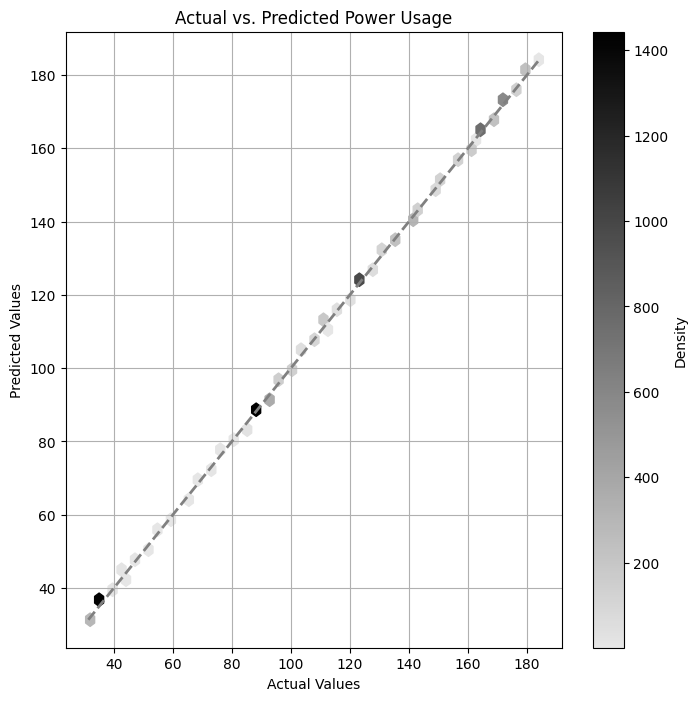

In [ ]:
plot_actual_vs_predicted(y_test_inv.flatten(), y_pred_inv.flatten(), "Actual vs. Predicted Power Usage")


In [14]:
#Transformer 

import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import math
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import MinMaxScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau

column_job = ['node_load1','node_netstat_Tcp_OutSegs','node_netstat_Tcp_RetransSegs','node_intr_total','node_netstat_Tcp_InSegs','node_procs_running','node_hwmon_temp_celsius-mean','node_network_transmit_bytes_total-sum','node_thermal_zone_temp-mean','node_arp_entries-sum','node_network_transmit_packets_total-sum','node_network_receive_bytes_total-sum','node_network_receive_packets_total-sum', 'TIMEOUT', 'COMPLETED',
       'CANCELLED', 'FAILED', 'surfsara_power_usage','OUT_OF_MEMORY', 'NODE_FAIL', 'jobCount_30s',
       'TIMEOUT_30s', 'COMPLETED_30s', 'CANCELLED_30s', 'FAILED_30s',
       'OUT_OF_MEMORY_30s', 'NODE_FAIL_30s','node_load1']
X = df[column_job]
y = df['surfsara_power_usage']


def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []

    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps), :].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    
    return np.array(Xs), np.array(ys)

sequence_length = 4
X_sequences, y_next = create_dataset(X, y, time_steps=sequence_length)

# Scaling X sequences
scaler_X = MinMaxScaler()
num_features = X.shape[1]  # This gives the number of columns or features in X
X_sequences_scaled = scaler_X.fit_transform(X_sequences.reshape(-1, sequence_length * num_features)).reshape(X_sequences.shape)


train_size = int(0.8 * len(X_sequences_scaled))
X_train, X_test = X_sequences_scaled[:train_size], X_sequences_scaled[train_size:]
y_train, y_test = y_next[:train_size], y_next[train_size:]

# Convert to PyTorch tensors
X_train_tensor, X_test_tensor = torch.Tensor(X_train), torch.Tensor(X_test)
y_train_tensor, y_test_tensor = torch.Tensor(y_train), torch.Tensor(y_test)

train_data, test_data = TensorDataset(X_train_tensor, y_train_tensor), TensorDataset(X_test_tensor, y_test_tensor)
train_loader, test_loader = DataLoader(train_data, batch_size=50, shuffle=True), DataLoader(test_data, batch_size=500)

# Define the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, feature_size, hidden_size, nhead, num_layers, output_size=1):
        super(TransformerModel, self).__init__()
        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(feature_size)
        encoder_layers = nn.TransformerEncoderLayer(feature_size, nhead, hidden_size)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.decoder = nn.Linear(feature_size, output_size)

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def forward(self, src):
       device = src.device
       if self.src_mask is None or self.src_mask.size(0) != len(src):
           mask = self._generate_square_subsequent_mask(len(src)).to(device)
           self.src_mask = mask
       src = self.pos_encoder(src)
       output = self.transformer_encoder(src, self.src_mask)
       prediction = self.decoder(output[:, -1])
       return prediction


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # Adjust the slicing of the positional encoding to the size of x
        x = x + self.pe[:x.size(1), :x.size(2)]
        return x




feature_size = 28
hidden_size = 512
nhead = 2
num_layers = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TransformerModel(feature_size, hidden_size, nhead, num_layers)
model = model.to(device)
test_batch_size = 500
test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=test_batch_size)
criterion = torch.nn.MSELoss()
model = TransformerModel(feature_size, hidden_size, nhead, num_layers)
model = model.to(device)

# Initialize weights
for m in model.modules():
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0.0)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.9, patience=3, verbose=True)

train_losses = []
test_losses = []

num_epochs = 50

# Training Loop
for epoch in range(num_epochs):
    model.train()  # set the model to training mode
    total_train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Optional: Evaluate the model on the test set and track the loss
    model.eval()  # set the model to evaluation mode
    total_test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_test_loss += loss.item()
    
    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    
    # Apply learning rate scheduler
    scheduler.step(avg_test_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Post-training Evaluation
all_predictions = []
all_targets = []


# Evaluation after all epochs
model.eval()
total_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        outputs = model(X_batch)
        all_predictions.append(outputs.cpu())
        all_targets.append(y_batch.cpu())
        mse_loss = criterion(outputs, y_batch)
        total_loss += mse_loss.item() * X_batch.size(0)

# Calculate average loss across all batches
avg_mse_loss = total_loss / len(test_loader.dataset)

# Calculate RMSE
rmse_loss = torch.sqrt(torch.tensor(avg_mse_loss))

print(f'Test RMSE Loss: {rmse_loss:.4f}')

# Concatenate all predictions and targets
all_predictions = torch.cat(all_predictions).numpy().reshape(-1, 1)
all_targets = torch.cat(all_targets).numpy().reshape(-1, 1)

# Since y is not scaled, we don't need to inverse transform. Directly convert to numpy arrays.
y_pred = np.squeeze(all_predictions)
y_test = np.squeeze(all_targets)

Epoch 1/50
1080/1080 [==============================] - 5s 4ms/step - loss: 0.0110
Epoch 2/50
1080/1080 [==============================] - 4s 3ms/step - loss: 6.2501e-05
Epoch 3/50
1080/1080 [==============================] - 4s 3ms/step - loss: 3.5202e-05
Epoch 4/50
1080/1080 [==============================] - 4s 3ms/step - loss: 2.2837e-05
Epoch 5/50
1080/1080 [==============================] - 4s 3ms/step - loss: 1.3645e-05
Epoch 6/50
1080/1080 [==============================] - 4s 3ms/step - loss: 7.6814e-06
Epoch 7/50
1080/1080 [==============================] - 4s 3ms/step - loss: 5.3487e-06
Epoch 8/50
1080/1080 [==============================] - 4s 3ms/step - loss: 5.0143e-06
Epoch 9/50
1080/1080 [==============================] - 4s 3ms/step - loss: 3.2804e-06
Epoch 10/50
1080/1080 [==============================] - 4s 3ms/step - loss: 3.4781e-06
Epoch 11/50
1080/1080 [==============================] - 4s 3ms/step - loss: 1.7945e-06
Epoch 12/50
1080/1080 [======================

In [15]:
idlePower = y.min()
maxPower = y.max()
factor = (maxPower - idlePower)/100
x = df['node_load1'].values
xMax = x.max()

Baseline RMSE: 0.369
Average Relative Error (RE): 39.298%


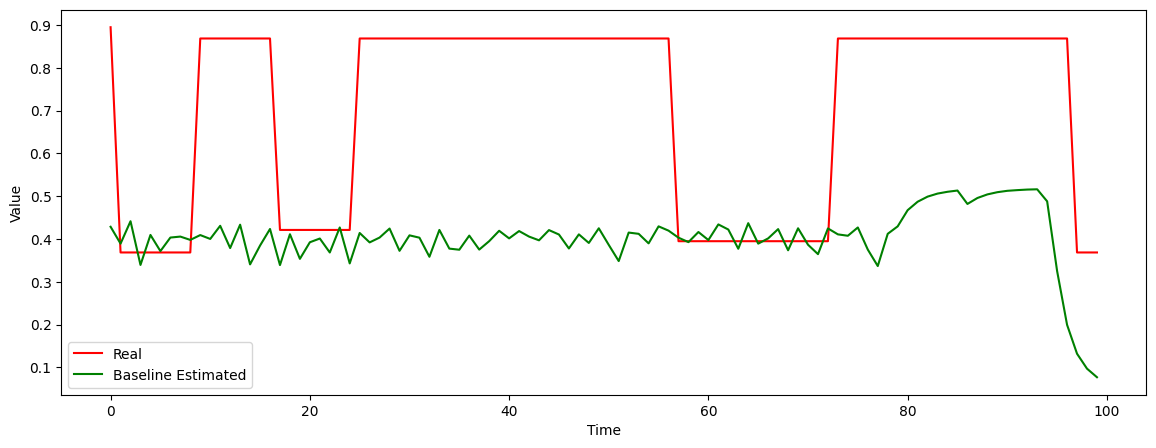

In [ ]:
from sklearn.metrics import mean_squared_error
import math
import numpy as np
import matplotlib.pyplot as plt

# Assuming x and y are pandas Series. If they're DataFrames, you'll need to select the correct column.
# For instance, if they're DataFrames, you might do something like: x = df['some_column_name'].values

def compute_baseline(x_val, idlePower, factor, xMax):
    return idlePower if x_val == 0 else idlePower + factor * (x_val/xMax) * 500

baseline_predictions = [compute_baseline(value, idlePower, factor, xMax) for value in x]

# Now calculate the RMSE for the first 100 values
baseline_mse = mean_squared_error(y[:100], baseline_predictions[:100])
baseline_rmse = math.sqrt(baseline_mse)
print('Baseline RMSE: %.3f' % baseline_rmse)

# Compute Relative Error (RE) for the first 100 values
relative_errors = np.abs((y[:100] - np.array(baseline_predictions[:100])) / y[:100]) * 100
average_re = np.mean(relative_errors)
print("Average Relative Error (RE): %.3f%%" % average_re)

# Plot actual vs. baseline for the first 100 values
plt.figure(figsize=(14,5))
plt.plot(y[:100], color = 'red', label = 'Real')
plt.plot(baseline_predictions[:100], color = 'green', label = 'Baseline Estimated')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


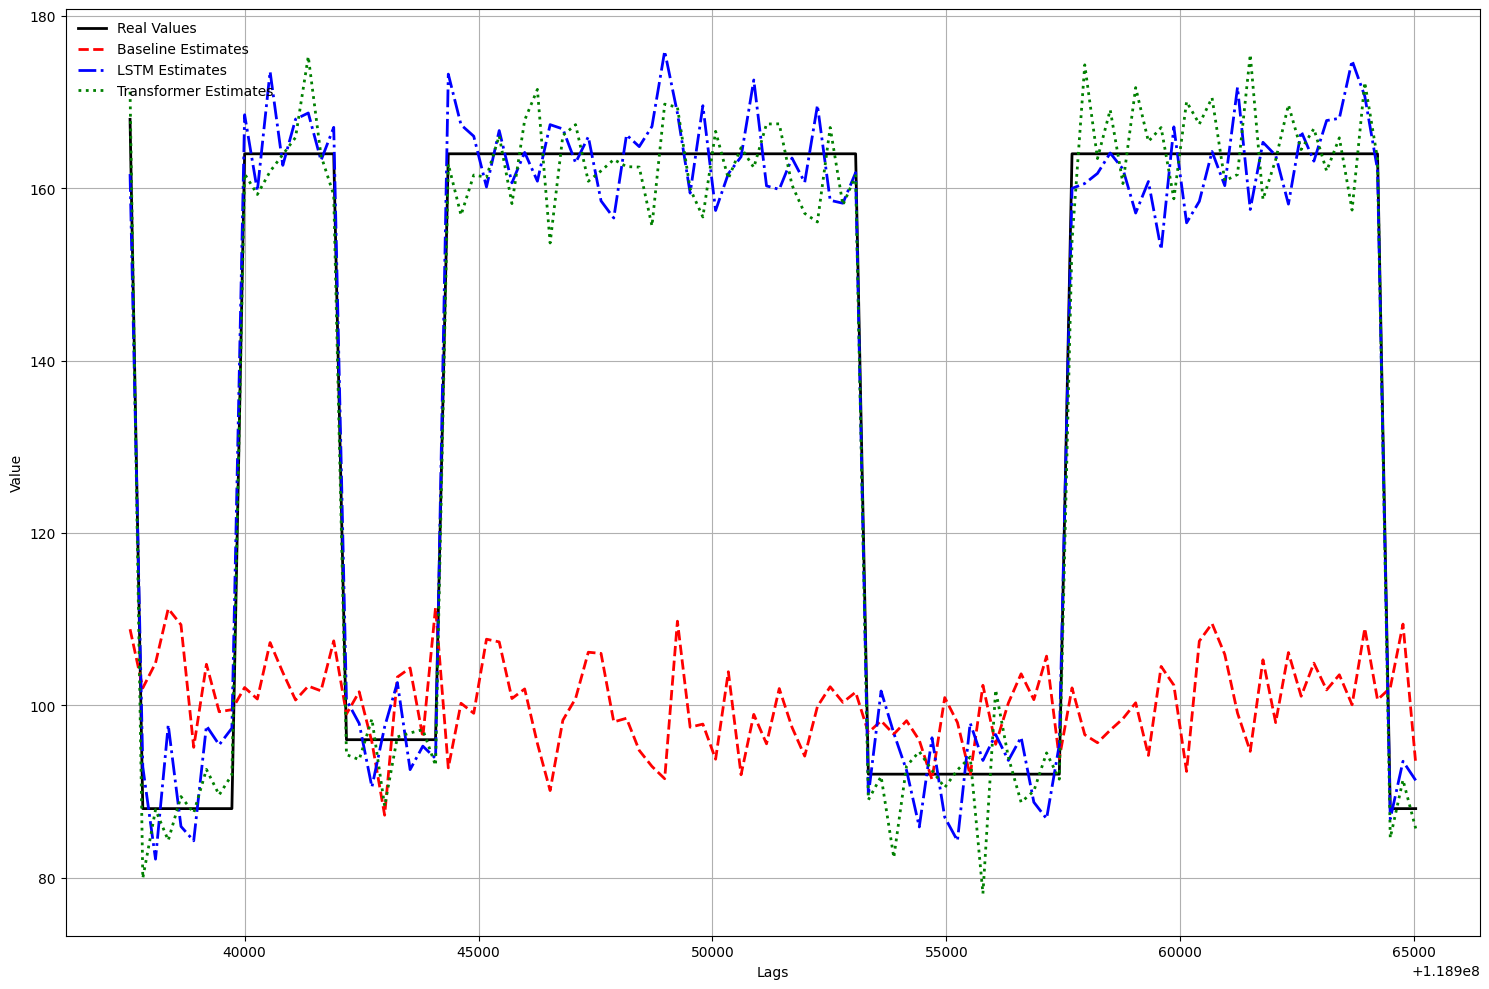

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Plotting
plt.figure(figsize=(15, 10))

plt.plot(index, real_values, label='Real Values', color='black', linestyle='-', linewidth=2)
plt.plot(index, baseline_values, label='Baseline Estimates', color='red', linestyle='--', linewidth=2)
plt.plot(index, lstm_values, label='LSTM Estimates', color='blue', linestyle='-.', linewidth=2)
plt.plot(index, transformer_values, label='Transformer Estimates', color='green', linestyle=':', linewidth=2)

plt.xlabel('Lags')
plt.ylabel('Value')

# You can also adjust the legend's location and frame
plt.legend(loc='upper left', frameon=False)

plt.grid(True)

# Show a tight layout
plt.tight_layout()

plt.show()